In [101]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, layers 

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [152]:
base_folder = "/AI FR/Extracted Faces"
faces = list()
i=0
j=0
for folder in os.listdir("/AI FR/Extracted Faces"):
    face = list()
    for file in os.listdir(os.path.join("/AI FR/Extracted Faces",folder)):
        face.append(plt.imread(os.path.join(base_folder,folder,file)))
    faces.append(face)
        
       
    

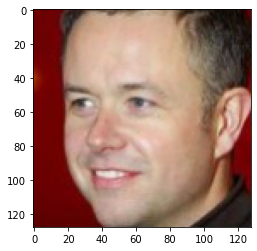

In [153]:
plt.imshow(faces[100][2])

In [187]:
training_data = list()
y_train = list()
for i in range(len(faces)-6):
    for j in range(len(faces[i])):
        example=np.concatenate([np.array(faces[i][0]),np.array(faces[i][j])],axis=2)
        # example.append(faces[i][0])
        # example.append(faces[i][j])
        y_train.append(1)
        training_data.append(example)
    for k in range(i,i+5):
        neg_example=np.concatenate([np.array(faces[i][0]),np.array(faces[k][0])],axis=2)
        # neg_example.append(faces[i][0])
        # neg_example.append(faces[k][0])
        y_train.append(0)
        training_data.append(neg_example)



In [133]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([6590, 6056], dtype=int64))

In [188]:
training_data = np.array(training_data)
y_train = np.array(y_train)

In [189]:
training_data.shape

(12646, 128, 128, 6)

In [177]:
def cnn_model(input_shape):
    inputs = layers.Input(input_shape)
    
    x = layers.Conv2D(16, kernel_size= 3)(inputs)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.Conv2D(32, kernel_size= 3)(x)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.Conv2D(64, kernel_size= 3)(x)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.Conv2D(128, kernel_size= 3)(x)
    x = layers.Activation("relu")(x)    
    x = layers.MaxPool2D()(x)
    
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    
    x = layers.Dense(64)(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Dense(16)(x)
    x = layers.Activation("relu")(x)
    
    x = layers.Dense(1)(x)
    outputs = layers.Activation("sigmoid")(x)
    
    model = Model(inputs, outputs)
    return model
    

In [137]:
dir(tf.keras.losses.B)

['BinaryCrossentropy',
 'BinaryFocalCrossentropy',
 'CategoricalCrossentropy',
 'CategoricalHinge',
 'CosineSimilarity',
 'Hinge',
 'Huber',
 'KLD',
 'KLDivergence',
 'LogCosh',
 'Loss',
 'MAE',
 'MAPE',
 'MSE',
 'MSLE',
 'MeanAbsoluteError',
 'MeanAbsolutePercentageError',
 'MeanSquaredError',
 'MeanSquaredLogarithmicError',
 'Poisson',
 'Reduction',
 'SparseCategoricalCrossentropy',
 'SquaredHinge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'binary_crossentropy',
 'binary_focal_crossentropy',
 'categorical_crossentropy',
 'categorical_hinge',
 'cosine_similarity',
 'deserialize',
 'get',
 'hinge',
 'huber',
 'kl_divergence',
 'kld',
 'kullback_leibler_divergence',
 'log_cosh',
 'logcosh',
 'mae',
 'mape',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'mean_squared_logarithmic_error',
 'mse',
 'msle',
 'poisson',
 'serialize',
 'sparse_categorical_crossen

In [178]:
input_shape = [128,128,6]
loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.0001,momentum=0.9)

model = cnn_model(input_shape)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 6)]     0         
                                                                 
 conv2d_29 (Conv2D)          (None, 126, 126, 16)      880       
                                                                 
 activation_52 (Activation)  (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 activation_53 (Activation)  (None, 61, 61, 32)        0         
                                                           

In [190]:
x_train,x_test,y_tran,y_test = train_test_split(training_data,y_train,test_size=0.2,shuffle=True)

In [185]:
type(y_tran)

numpy.ndarray

In [191]:
model.fit(x_train,y_tran,epochs=10)

Epoch 1/10
317/317 [==============================] - 137s 424ms/step - loss: 0.7125 - accuracy: 0.5343
Epoch 2/10
317/317 [==============================] - 132s 416ms/step - loss: 0.6778 - accuracy: 0.5736
Epoch 3/10
317/317 [==============================] - 134s 421ms/step - loss: 0.6572 - accuracy: 0.6008
Epoch 4/10
317/317 [==============================] - 130s 411ms/step - loss: 0.6403 - accuracy: 0.6218
Epoch 5/10
317/317 [==============================] - 130s 409ms/step - loss: 0.6273 - accuracy: 0.6406
Epoch 6/10
317/317 [==============================] - 131s 413ms/step - loss: 0.6150 - accuracy: 0.6488
Epoch 7/10
317/317 [==============================] - 129s 406ms/step - loss: 0.6034 - accuracy: 0.6652
Epoch 8/10
317/317 [==============================] - 130s 409ms/step - loss: 0.5943 - accuracy: 0.6710
Epoch 9/10
317/317 [==============================] - 129s 406ms/step - loss: 0.5870 - accuracy: 0.6745
Epoch 10/10
317/317 [==============================] - 129s 407m

In [134]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (dataset iterations).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(inputs, 

In [98]:
y_pred = model.predict(x_test)

80/80 [==============================] - 10s 129ms/step


In [130]:
np.unique(y_pred)

array([0.], dtype=float32)

In [121]:
model.predict(x_test[0:3])

1/1 [==============================] - 0s 99ms/step


array([[0.],
       [0.],
       [0.]], dtype=float32)

In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.525691699604743


In [100]:
abd_capture = plt.imread('abd_capture.jpg')
abd_real = plt.imread('abd_real.jpg')

Number of detected faces: 1


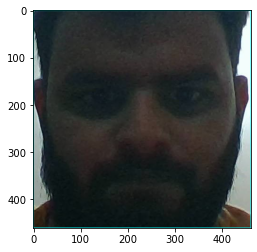

In [111]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(abd_capture, 1.1, 2)
print('Number of detected faces:', len(faces))
for (x,y,w,h) in faces: 
   cv2.rectangle(abd_capture,(x,y),(x+w,y+h),(0,255,255),2)
   extracted_capture = abd_capture[y:y+h,x:x+w]
plt.imshow(extracted_capture)

Number of detected faces: 1


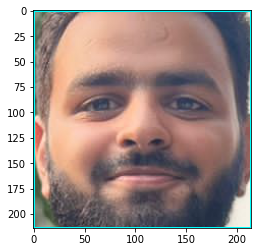

In [108]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
faces = face_cascade.detectMultiScale(abd_real, 1.3, 2)
print('Number of detected faces:', len(faces))
for (x,y,w,h) in faces: 
   cv2.rectangle(abd_real,(x,y),(x+w,y+h),(0,255,255),2)
   extracted_real = abd_real[y:y+h,x:x+w]
plt.imshow(extracted_real)

In [114]:
# extracted_capture = cv2.resize(extracted_capture, (128,128), interpolation = cv2.INTER_AREA)
extracted_real = cv2.resize(extracted_real, (128,128), interpolation = cv2.INTER_AREA)

In [195]:
abd = np.concatenate([extracted_capture,extracted_capture],axis=2)
test_data = list()
test_data.append(abd)
test_data=np.array(test_data)
print(model.predict(test_data))

1/1 [==============================] - 0s 41ms/step
[[0.7966072]]


In [119]:
abd.shape

(128, 128, 6)